# Dependencies

In [2]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [3]:
library(ggalluvial)
library(randomcoloR)

Loading required package: ggplot2



# Functions

In [4]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/clonetrack.R")

In [5]:
# trbbarplot.fx <- function(metadta, pat) {
#       pat_sample <- metadta[metadta$Patient == pat, ] # should not contain NA
#       # TRB bar plot
#       barpt <- ggplot(data = pat_sample, aes(y = TRB, x = basename)) +
#             geom_bar(fill = "#f3b94e", colour = "#030303", stat = "identity") +
#             theme(
#                   axis.title.x = element_blank(),
#                   axis.text.x = element_blank(),
#                   axis.line = element_line(color = "black"),
#                   axis.text = element_text(size = 15),
#                   axis.title = element_text(size = 15),
#                   legend.position = "none"
#             ) +
#             theme(
#                   panel.grid.major = element_blank(),
#                   panel.grid.minor = element_blank(),
#                   panel.background = element_rect(fill = "transparent", colour = NA),
#                   panel.border = element_blank(),
#                   plot.margin = unit(c(0, 0, 0, 0), "cm"),
#                   plot.title = element_text(size = 15, hjust = 0.5)
#             ) + ggtitle(expression(underline(pat, ":", unique(pat_sample$Disease_type))))
#       return(barpt)
# }


In [27]:
trbpointplot.fx <- function(metadta, pat) { # need type_col in global env
      pat_sample <- metadta[metadta$Patient == pat, ] # should not contain NA

      # order sampletype Tumor, PBMC, cfDNA
      pat_sample$sampletype <- factor(pat_sample$sampletype, levels = c("Tumor", "PBMC", "cfDNA"))
      # order samplename by cycle and sampletype
      pat_sample$basename <- factor(pat_sample$basename, levels = unique(pat_sample$basename[order(pat_sample$cycle, pat_sample$sampletype)]))

      # TRB bar plot
      pointp <- ggplot(data = pat_sample, aes(y = TRB, x = basename, color = sampletype)) +
            geom_point(size = 5) +
            theme(
                  axis.title.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.line = element_line(color = "black"),
                  axis.text = element_text(size = 15),
                  axis.title = element_text(size = 15),
                  legend.position = "none"
            ) +
            theme(
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_rect(fill = "transparent", colour = NA),
                  panel.border = element_blank(),
                  plot.margin = unit(c(1, 0, 0, 0), "cm"),
                  plot.title = element_text(size = 15, hjust = 0.5)
            ) +
            scale_y_continuous(trans = "log10") +
            annotation_logticks(sides = "l") + # log10 scale
            scale_color_manual(values = type_col) +
            ggtitle(expression(underline(paste0(pat, ":", unique(pat_sample$Disease_type)))) )

      return(pointp)
}


In [7]:
order_cdr3df.fx <- function(mycdr3df) { # output from cdr3_dataframe.fx

    mycdr3df$sampletype <- NA
    mycdr3df$sampletype[grepl("PBMC", mycdr3df$samplename)] <- "PBMC"
    mycdr3df$sampletype[grepl("cfDNA", mycdr3df$samplename)] <- "cfDNA"
    mycdr3df$sampletype[grepl("FFPE", mycdr3df$samplename)] <- "Tumor"

    # create column cycle in cdr3df and add cycle info from samplename
    mycdr3df$cycle <- NA
    mycdr3df$cycle[grepl("FFPE", mycdr3df$samplename)] <- "Baseline"
    mycdr3df$cycle[grepl("-01", mycdr3df$samplename)] <- "Pre-cycle 1"
    mycdr3df$cycle[grepl("-02", mycdr3df$samplename)] <- "Pre-cycle 2"
    mycdr3df$cycle[grepl("-03", mycdr3df$samplename)] <- "Pre-cycle 3"
    mycdr3df$cycle[grepl("-04", mycdr3df$samplename)] <- "Pre-cycle 4"
    mycdr3df$cycle[grepl("-05", mycdr3df$samplename)] <- "Pre-cycle 5"

    mycdr3df$samplelabel <- paste0(mycdr3df$cycle, " - ", mycdr3df$sampletype)

    # order sampletype Tumor, PBMC, cfDNA
    mycdr3df$sampletype <- factor(mycdr3df$sampletype, levels = c("Tumor", "PBMC", "cfDNA"))
    # order samplename by cycle and sampletype
    mycdr3df$samplename <- factor(mycdr3df$samplename, levels = unique(mycdr3df$samplename[order(mycdr3df$cycle, mycdr3df$sampletype)]))

    return(mycdr3df)
}

# Paths

In [8]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [9]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [10]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [11]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [12]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
287,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.601,0.073,8.556,8.561,0.094,CHP_10YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,PBMC,CHP,1.0249370
288,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.614,0.054,10.406,10.414,0.066,CHP_11YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,PBMC,CHP,1.0647200
289,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.989,0.036,8.560,8.570,0.060,CHP_15YO-F-A_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,PBMC,CHP,0.9533731
290,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.334,0.040,5.870,5.876,0.066,CHP_15YO-F-B_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,PBMC,CHP,0.8014037
291,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.120,0.040,20.321,20.339,0.068,CHP_15YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,PBMC,CHP,1.3244882
292,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.973,0.007,3.944,3.946,0.013,CHP_16YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,PBMC,CHP,0.5990092


In [13]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


In [14]:
mytab <- as.data.frame.matrix(table(meta_div$Patient, meta_div$sampletype) )

In [15]:
morethanone <- mytab[rowSums(mytab) > 1, ]

In [16]:
morethanone

,cfDNA,PBMC,Tumor
,<int>,<int>,<int>
CHP_323,2,2,0
CHP_324,2,1,0
CHP_328,1,2,0
CHP_330,1,1,0
CHP_331,1,2,0
CHP_334,3,0,0
CHP_335,2,1,0
CHP_336,3,0,0
CHP_337,3,0,0


## T-ALL

In [17]:
tall <- meta_div[ meta_div$Disease_type == "T-ALL",]

In [18]:
table(tall$Patient)


CHP_324 CHP_375 CHP_387 CHP_395 
      3       6       5       2 

In [19]:
CHP_387 <- tall$file[ tall$Patient == "CHP_387"]

In [21]:
cdr3df <- cdr3_dataframe.fx(paste0(h4hpath,"NextSeq/"), "TRB", CHP_387, "inframe")

my files:



[1] "batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt"                
[2] "batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt"               
[3] "batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt"             
[4] "remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt"
[5] "batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt"            


Total recovered clonotypes:



[1] 478


Total out-of-frame clonotypes:



[1] 116


Total clonotypes with stop codon:



[1] 6


Total productive clonotypes:



[1] 356


Output contains in_frame clonotypes only



In [23]:
cdr3df_pt <- order_cdr3df.fx(cdr3df)

In [24]:
table(cdr3df_pt$cycle)


Pre-cycle 1 Pre-cycle 2 Pre-cycle 3 
        284           4          68 

In [25]:
p387 <- plot_clonetracks.fx(cdr3df_pt, plotpath, "TRB", "cloneFraction", 0, "T-ALL", 222)

list of samples to track clones: 



[1] CHP_387-01-PBMC-DNA CHP_387-03_PBMC_DNA CHP_387-01_cfDNA   
[4] CHP_387-02_cfDNA    CHP_387-03_cfDNA   
5 Levels: CHP_387-01-PBMC-DNA CHP_387-01_cfDNA ... CHP_387-03_cfDNA


Total number of recurring clonotypes: 



[1] 8


these are what we color: 



               TGTGCCAGCAGTTACAGCTCTGGGGCCAACGTCCTGACTTTC 
                                                "#D87A68" 
               TGTGCCAGCAGTGACCTGACAGGGTTTAAGGGCTACACCTTC 
                                                "#87D9C2" 
TGTGCCAGCAGCCGCAATACCCAGCCCCAGGTGGGACGGTCCAATGAGCAGTTCTTC 
                                                "#D57AC2" 
   TGTGCCAGCAGTTACTCGACAGGGGACTACTCTGGGGCCAACGTCCTGACTTTC 
                                                "#D7D17D" 
               TGTGCCAGCAGGTCTAGCGGTTCCTACAATGAGCAGTTCTTC 
                                                "#A753DF" 
            TGCGCCAGCAGCCCCGGCGACAGGGCTAAGACTGAAGCTTTCTTT 
                                                "#D9CCD1" 
               TGCGCCAGCAGCTATGGGGGAGGGAATTCACCCCTCCACTTT 
                                                "#92E569" 
            TGCGCCAGCAGCCAAGGGGGGGCGAGTAAGACTGAAGCTTTCTTT 
                                                "#85A2D7" 


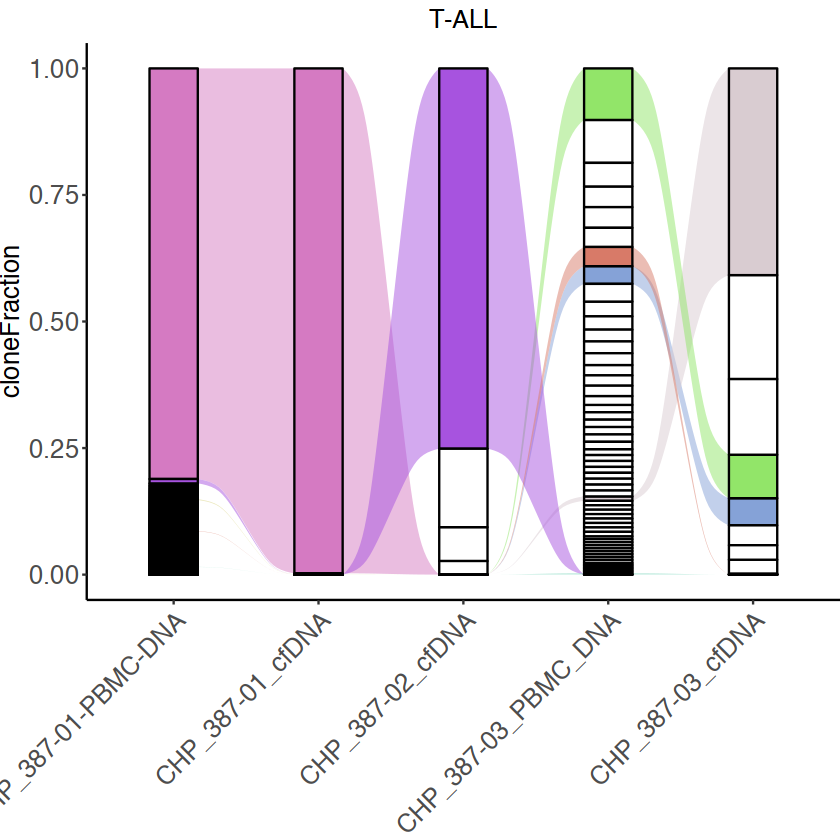

In [26]:
p387

In [28]:
ls()

[1] "addjurkat.fx"            "age_pal"                
 [3] "align_plots1"            "calculate_delta.fx"     
 [5] "cdr3_dataframe.fx"       "cdr3df"                 
 [7] "cdr3df_pt"               "CHP_387"                
 [9] "cohort_col"              "cycle_col"              
[11] "datapath"                "delta_basespiderplot.fx"
[13] "gitpath"                 "group_col"              
[15] "h4hpath"                 "histdenp"               
[17] "histp"                   "manifestpath"           
[19] "message_parallel"        "meta_div"               
[21] "morethanone"             "myaxis"                 
[23] "myplot"                  "mytab"                  
[25] "order_cdr3df.fx"         "p387"                   
[27] "plot_clonetracks.fx"     "plotpath"               
[29] "round_and_format"        "safe_mclapply"          
[31] "sampletags_columns"      "tall"                   
[33] "text_matrix"             "toString_onefle.fx"     
[35] "track_Aclone.fx"         "trbbarplot.fx"          
[37] "trbpointplot.fx"         "type_col"

In [32]:
trb_p <- trbpointplot.fx(metadta = meta_div, pat = "CHP_387")

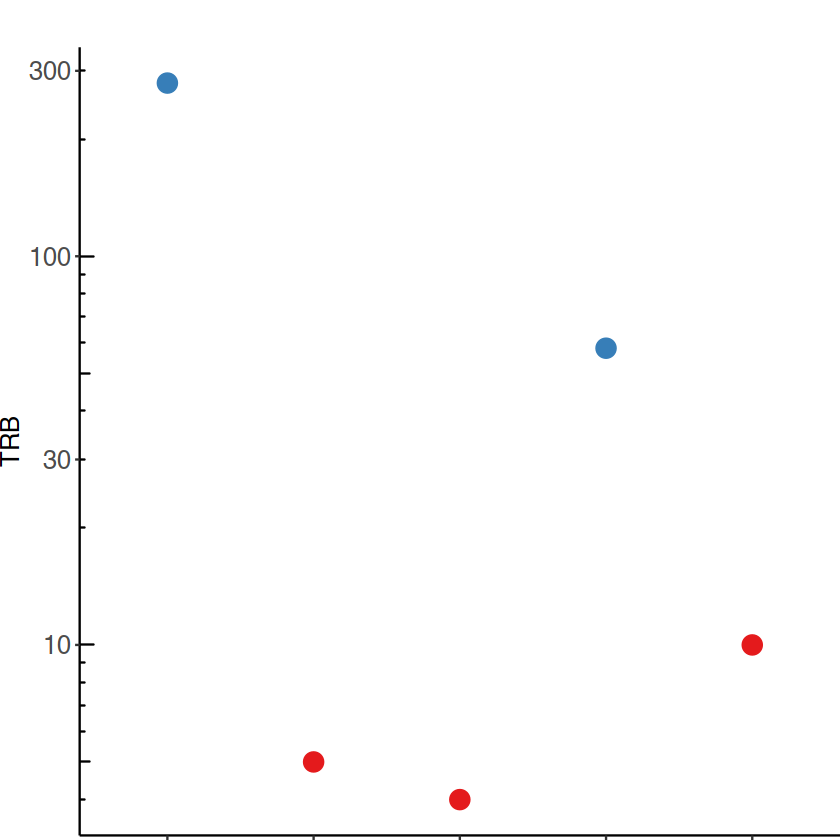

In [33]:
trb_p

In [31]:
pdf(paste0(plotpath, "Clonetrack_CHP_387_TRB.pdf"), width = 5, height = 10)
cowplot::plot_grid(trb_p + ggtitle(expression(underline("CHP_387: T-ALL"))),
    p387 + theme(plot.title = element_blank()),
    ncol = 1, align = "v", rel_heights = c(0.3, 1)
)
dev.off()


pdf 
  2

In [86]:
# cairo_pdf(paste0(plotpath, "CHP_387_TRB.pdf"), width = 10, height = 15)
# p387 + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B2 clone fraction", x = "Sample prior to chemotherapy cycle") + 
# scale_x_discrete(labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3"))
# dev.off()

pdf 
  2

## Solid tumors

In [115]:
meta_div[ grepl("FFPE", meta_div$basename), c("Patient", "Disease_type") ]

,Patient,Disease_type
,<chr>,<chr>
159,CHP_344,BL
281,CHP_361,HD
308,CHP_364,OS
324,CHP_366,HD
354,CHP_370,ALCL
372,CHP_372,BL
426,CHP_380,HD
493,CHP_389,HD
501,CHP_390,OS


In [166]:
myCHP <- "CHP_364"

In [171]:
mycase <- meta_div$file[ meta_div$Patient == myCHP]
mycase <- mycase[ !grepl("cfDNA", mycase) ]

In [172]:
cdr3df <- cdr3_dataframe.fx(paste0(h4hpath,"NextSeq/"), "TRB", mycase, "inframe")

my files:



[1] "batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt"  
[2] "batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt"  
[3] "batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt"  
[4] "batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt"


Total recovered clonotypes:



[1] 426


Total out-of-frame clonotypes:



[1] 87


Total clonotypes with stop codon:



[1] 12


Total productive clonotypes:



[1] 327


Output contains in_frame clonotypes only



In [173]:
table(cdr3df$samplename)


CHP_364-01-PBMC-DNA CHP_364-02-PBMC-DNA CHP_364-04-PBMC-DNA CHP_364-FFPE-DNA_S1 
                125                  75                 117                  10 

In [174]:
cdr3df$samplename <- factor(cdr3df$samplename, levels = c("CHP_364-FFPE-DNA_S1", "CHP_364-01-PBMC-DNA", "CHP_364-02-PBMC-DNA", "CHP_364-04-PBMC-DNA"))

list of samples to track clones: 



[1] CHP_364-01-PBMC-DNA CHP_364-02-PBMC-DNA CHP_364-04-PBMC-DNA
[4] CHP_364-FFPE-DNA_S1
4 Levels: CHP_364-FFPE-DNA_S1 CHP_364-01-PBMC-DNA ... CHP_364-04-PBMC-DNA


Total number of recurring clonotypes: 



[1] 4


these are what we color: 



TGTGCCATCAGTGGACCCGGGACTAGCGGGAGGGCACAAGATACGCAGTATTTT 
                                             "#A3CECE" 
            TGTGCCAGCAGTGGACTAGCGGGAGCAGATACGCAGTATTTT 
                                             "#B5E079" 
               TGTGCCAGCAGTGCAGGGAACACCGGGGAGCTGTTTTTT 
                                             "#BB74D2" 
                  TGTGCCAGCAGCTTGCTAGAACAGCCCCAGCATTTT 
                                             "#DE9788" 


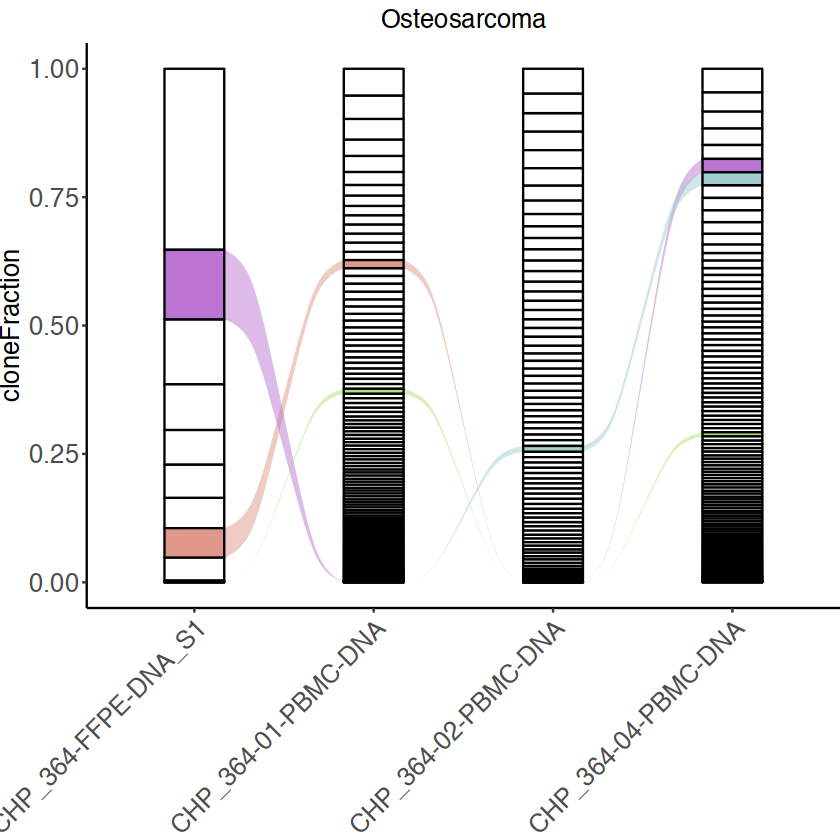

In [175]:
p <- plot_clonetracks.fx(cdr3df, plotpath, "TRB", "cloneFraction", 0, "Osteosarcoma", 422)
p

In [176]:
cairo_pdf(paste0(plotpath, "CHP_364_OS_FFPE_PBMC_TRB.pdf"), width = 10, height = 15)
p387 + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B2 clone fraction", x = "Sample prior to chemotherapy cycle") + 
scale_x_discrete(labels = c("Tumor", "Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3"))
dev.off()

pdf 
  2

# CSF

In [147]:
myfle <- list.files( "~/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq/", recursive = T, pattern = "CLONES_TRA", full.names = TRUE)

In [148]:
myfle <- myfle[! grepl("20000", myfle) ]

In [149]:
myfle

[1] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch1/mixcr/clones/CLONES_TRAIPD_HSJ023_Tumor.txt"
 [2] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch1/mixcr/clones/CLONES_TRAIPD_HSJ050_Tumor.txt"
 [3] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch1/mixcr/clones/CLONES_TRAIPD_HSJ051_Tumor.txt"
 [4] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA023-CSF.txt"         
 [5] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA051-CSF.txt"         
 [6] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA051R-CSF.txt"        
 [7] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA19-CSF.txt"          
 [8] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA41-CSF.txt"          
 [9] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA67-CSF.txt"          
[10] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA76-Tum.txt"          
[11] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA77-Tum.txt"          
[12] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA023-Plasma.txt"      
[13] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA50-CSF.txt"          
[14] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA67-Tum.txt"          
[15] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA68-Plasma.txt"       
[16] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA68-Tum.txt"          
[17] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA76-CSF.txt"          
[18] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA76-Plasma.txt"       
[19] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA77-CSF.txt"          
[20] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA77-Plasma.txt"

In [168]:
mycase <- "67" #  51 TRB no clones

In [169]:
HSJ <- myfle[ grepl(mycase, myfle) ]

In [170]:
HSJ

[1] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA67-CSF.txt"
[2] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA67-Tum.txt"

In [171]:
cdr3df <- cdr3_dataframe.fx("", "TRA", HSJ, "inframe")

my files:



[1] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch2/mixcr/clones/CLONES_TRA67-CSF.txt"
[2] "/Users/anabbi/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq//batch3/mixcr/clones/CLONES_TRA67-Tum.txt"


Total recovered clonotypes:



[1] 130


Total out-of-frame clonotypes:



[1] 63


Total clonotypes with stop codon:



[1] 7


Total productive clonotypes:



[1] 60


Output contains in_frame clonotypes only



In [173]:
table(cdr3df$samplename)


67-CSF 67-Tum 
    32     28 

In [174]:
cdr3df$samplename[ cdr3df$samplename == "67-CSF"] <- "CSF"
#cdr3df$samplename[ cdr3df$samplename == "77-Plasma"] <- "Plasma"
cdr3df$samplename[ cdr3df$samplename == "67-Tum"] <- "Tumor"

In [175]:
cdr3df$samplename <- factor(cdr3df$samplename, levels = c("Tumor", "CSF"))

list of samples to track clones: 



[1] CSF   Tumor
Levels: Tumor CSF


Total number of recurring clonotypes: 



[1] 3


these are what we color: 



TGTGTGGTGAACCTATATGCTGGCAACAACCGTAAGCTGATTTGG 
                                    "#BD6BCA" 
TGTGCTGGGCAGCACAGTGCTGTGATTTATAGCACATTCATCTTT 
                                    "#B4D77B" 
TGTGCTGTGAGTGCGGGGTACAGCAGTGCTTCCAAGATAATCTTT 
                                    "#B4C0C3" 


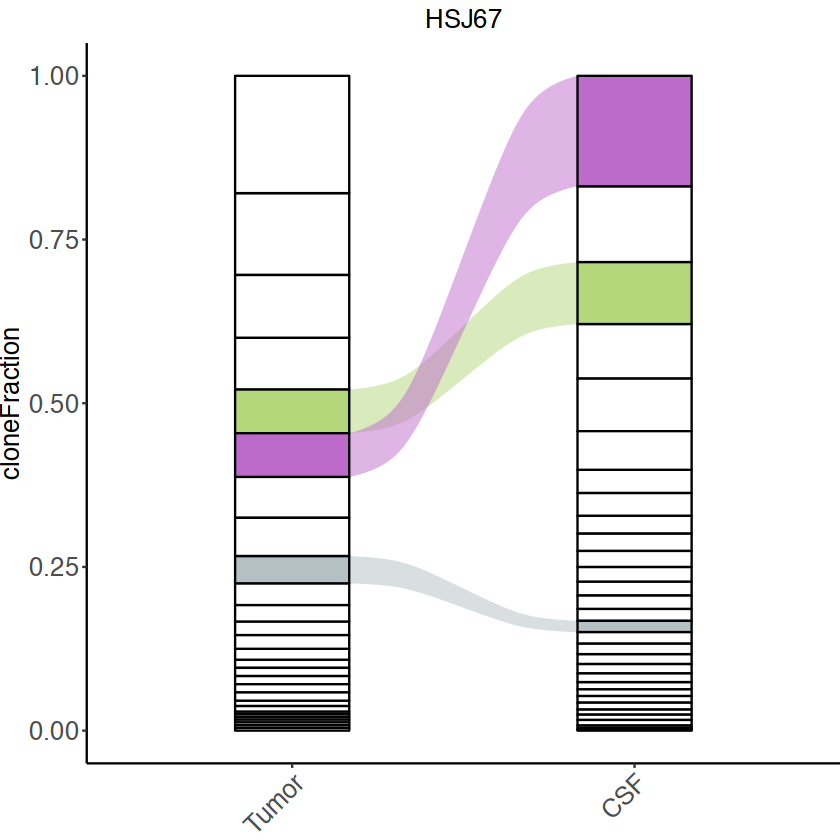

In [176]:
p <- plot_clonetracks.fx(cdr3df, plotpath, "TRA", "cloneFraction", 0, "HSJ67", 222)
p

In [177]:
cairo_pdf(paste0(plotpath, "HSJ_67_Tum_CSF_TRA.pdf"), width = 10, height = 15)
p + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B1 clone fraction", x = "", title = "")
dev.off()

pdf 
  2